In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from math import exp
%matplotlib inline

#importing the titanic data set
titanic_data = sns.load_dataset('titanic')
#viewing the first 10 rows of the data set
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
#finding the number of passengers
print("number of passengers in original data:" +str(len(titanic_data.index)))

number of passengers in original data:891


<AxesSubplot:xlabel='survived', ylabel='count'>

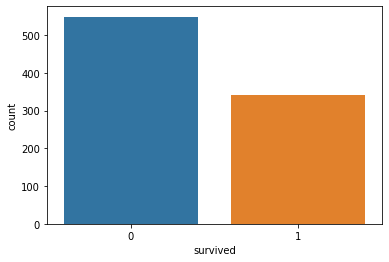

In [5]:
#this part of the dataset will be used as the binary output
sns.countplot(x="survived", data = titanic_data)

In [6]:
#Cleaning the data of unecessary NaN values and empty columns
#this will show which columns have null values, false meaning they do not have null value and true meaning they do
titanic_data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#this will show a sum of the values which are null in the respective columns
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
#to get a clearer understanding of which columns are already in terms of binary values and which are not
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
#dropping the deck column as it is full of NaN values
titanic_data.drop("deck",axis=1,inplace=True)

In [10]:
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
#dropping all the null values in the columns
titanic_data.dropna(inplace=True)

In [12]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
#converting string variables to dummy variables
#since we only need one column to figure out if a person is male or female
gender = pd.get_dummies(titanic_data['sex'],drop_first=True)
gender.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
#Here we only need two columns to get the total information, therefore the firt column can be dropped
embark=pd.get_dummies(titanic_data["embarked"],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
#Here also we only need two columns to get the total information, therefore the firt column can be dropped
pcl=pd.get_dummies(titanic_data["pclass"],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [16]:
#Now all these data have been made catagorical and need to be concatenated into the rows
titanic_data=pd.concat([titanic_data,gender],axis=1)
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [17]:
#Now to delete all the unnecessary data
titanic_data.drop(['sex','sibsp','parch','fare','class','who','adult_male','embark_town','alive','alone','embarked'],axis=1,inplace=True)

In [18]:
#x = titanic_data.drop("survived",axis=1,inplace=True)
#x.head(5)
titanic_data.head(5)

,survived,pclass,age,male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
